<a href="https://colab.research.google.com/github/samtrrs52/Extraccion_De_Caracteristicas/blob/main/4_2_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LIBRERÍAS Y CARGA DE ARCHIVOS**

In [ ]:
#Instalamos librería para análisis de variables categóricas
%pip install funPyModeling

In [3]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [42]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [43]:
#Verificamos información del DataFrame
print("Información del DataFrame:")
Micro_Retailer.info()
print("\n")

valores_nulos=Micro_Retailer.isnull().sum()
print("Conteo de valores nulos por columna: \n", valores_nulos)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


Conteo de valores nulos por columna: 
 _record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64


#**LIMPIEZA DEL DF**

Por cuartiles y eliminación de nulos

In [44]:
#Separamos las columnas con variables cualitativas y las variables cuantitativas
numeros=Micro_Retailer.select_dtypes(include=["float64","int64"])
palabras=Micro_Retailer.select_dtypes(include=["object"])

#Sustituimos con texto "Sin datos" de las columnas cualitativas que no cuentan con variables
palabras_limpio=palabras.fillna("--")

#Eliminamos


#Eliminamos outliers con rangos intercuartilicos y nulos con 0 una vez limpio el df
numeros_limpio = numeros.copy()

q=numeros
percentile25=q.quantile(0.25) #Q1
percentile75=q.quantile(0.75) #Q3
iqr= percentile75 - percentile25
Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
numeros_limpio = numeros_limpio[(q<Limite_Superior_iqr)&(q>Limite_Inferior_iqr)]

numeros_limpio = numeros_limpio.fillna("0.0")

#Concatenamos las columnas para tener un solo data frame
df=pd.concat([numeros_limpio,palabras_limpio],axis=1)

#Imprimimos nuevamente los valores nulos para verificar que ya no contamos con estos
print('\n Número de valores nulos')
nulos=df.isnull().sum()
nulos


 Número de valores nulos


_latitude                                            0
_longitude                                           0
97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
                                                    ..
267_technology_investment_customer_preferences       0
234_willingness_participate_workshop                 0
318_shopkeeper_name                                  0
319_shopkeepers_last_name                            0
235_email                                            0
Length: 106, dtype: int64

#**ANÁLISIS UNIVARIABLE**

###Análisis por columna

In [45]:
#Análisis univariable de cada columna
c1=freq_tbl(df['_updated_by'])
c1=c1.set_index('_updated_by')

c2=freq_tbl(df['232_type_of_store'])
c2=c2.set_index('232_type_of_store')

c3=freq_tbl(df['184_store_devices'])
c3=c3.set_index('184_store_devices')

c4=freq_tbl(df['5_change_store_space_last_year'])
c4=c4.set_index('5_change_store_space_last_year')

c5=freq_tbl(df['49_inventory_records'])
c5=c5.set_index('49_inventory_records')

c6=freq_tbl(df['18_sales_records'])
c6=c6.set_index('18_sales_records')

c7=freq_tbl(df['210_sales_channels'])
c7=c7.set_index('210_sales_channels')

c8=freq_tbl(df['214_customer_relationship_tools'])
c8=c8.set_index('214_customer_relationship_tools')

c9=freq_tbl(df['157_frequency_organize_shelves'])
c9=c9.set_index('157_frequency_organize_shelves')

c10=freq_tbl(df['108_does_the_micro_retailer_has_a_barred_window_'])
c10=c10.set_index('108_does_the_micro_retailer_has_a_barred_window_')

c11=freq_tbl(df['99_does_the_micro_retailer_exhibits_products_outside_'])
c11=c11.set_index('99_does_the_micro_retailer_exhibits_products_outside_')

c12=freq_tbl(df['102_does_the_micro_retailer_sells_fresh_products_'])
c12=c12.set_index('102_does_the_micro_retailer_sells_fresh_products_')

c13=freq_tbl(df['20_reviews_finances_monthly'])
c13=c13.set_index('20_reviews_finances_monthly')

c14=freq_tbl(df['19_tax_id'])
c14=c14.set_index('19_tax_id')

c15=freq_tbl(df['310_burnout'])
c15=c15.set_index('310_burnout')

c16=freq_tbl(df['186_internet_connection'])
c16=c16.set_index('186_internet_connection')

c17=freq_tbl(df['33_credit_to_customers'])
c17=c17.set_index('33_credit_to_customers')

c18=freq_tbl(df['227_agreement_ecommerce_platforms'])
c18=c18.set_index('227_agreement_ecommerce_platforms')

c19=freq_tbl(df['6_change_employees_average_salary_last_year'])
c19=c19.set_index('6_change_employees_average_salary_last_year')

c20=freq_tbl(df['193_sales_planning_tools'])
c20=c20.set_index('193_sales_planning_tools')

###Gráficas de barras

                                   frequency  percentage  cumulative_perc
_updated_by                                                              
Salomon Abdala Perez                      20    0.116959         0.116959
Ángel Francisco Altamirano Campos         16    0.093567         0.210526
José Zapata                               14    0.081871         0.292398
Emilio Garza                              13    0.076023         0.368421
Benjamin Barbosa                          13    0.076023         0.444444
Pedro Contreras                           12    0.070175         0.514620
Eduardo Zárate                             9    0.052632         0.567251
Alejandro Matias                           8    0.046784         0.614035
Harry Hernández                            7    0.040936         0.654971
Francisco Adán                             7    0.040936         0.695906
Hiram Jiménez                              6    0.035088         0.730994
Ismael López                          

Text(0, 0.5, 'Valores Univariables')

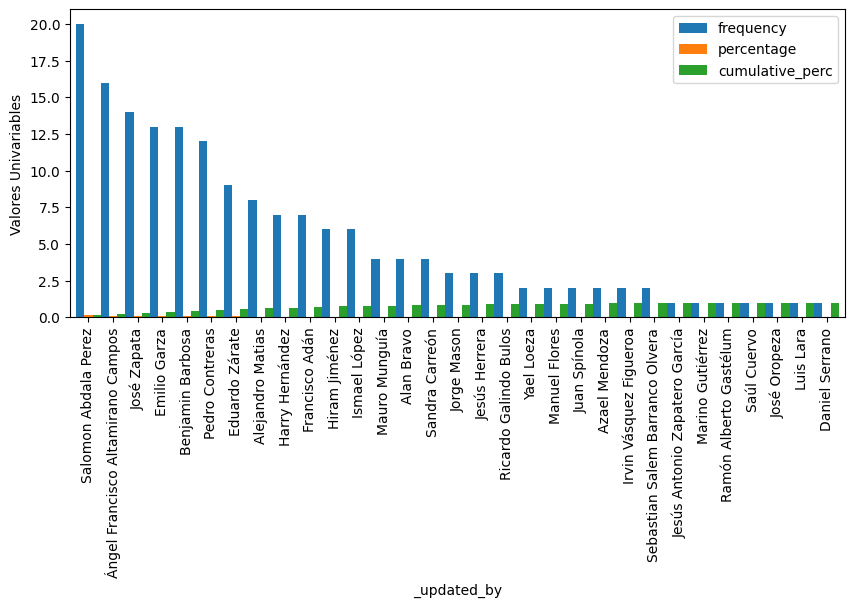

In [46]:
#Análisis univariable de una columna
print(c1)
#Gráfica de barras
c1.plot(kind = "bar", width=1, figsize=(10,4))
plt.ylabel("Valores Univariables")

                                 frequency  percentage  cumulative_perc
232_type_of_store                                                      
Grocery store (aka. nanostore)          52    0.304094         0.304094
Micro-restaurant (aka. fondita)         31    0.181287         0.485380
Dairy products                          10    0.058480         0.543860
Cafeteria                                6    0.035088         0.578947
Butcher shop                             6    0.035088         0.614035
...                                    ...         ...              ...
joyeria                                  1    0.005848         0.976608
dulceria                                 1    0.005848         0.982456
Ropa                                     1    0.005848         0.988304
Ferretería                               1    0.005848         0.994152
productos tradicionales                  1    0.005848         1.000000

[64 rows x 3 columns]


Text(0, 0.5, 'Valores Univariables')

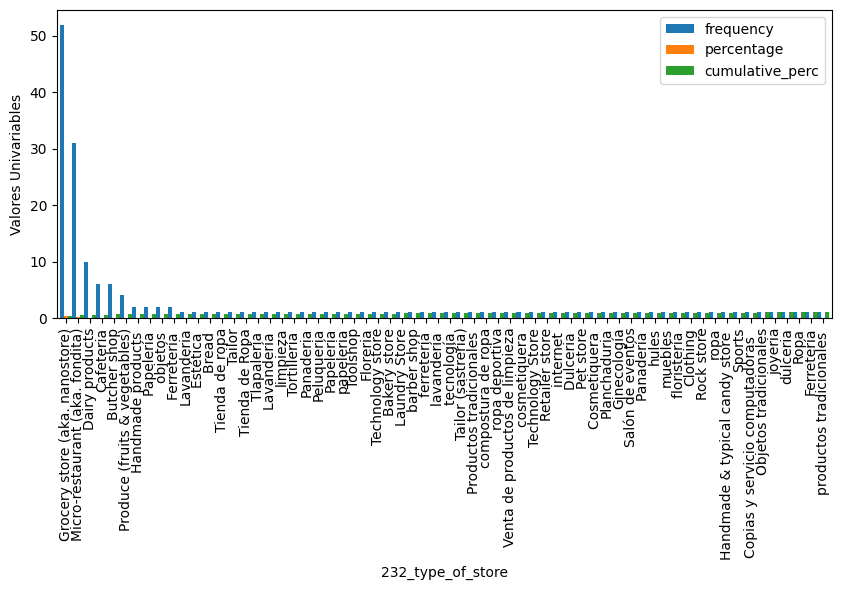

In [47]:
#Análisis univariable de una columna
print(c2)
#Gráfica de barras
c2.plot(kind = "bar", width=1, figsize=(10,4))
plt.ylabel("Valores Univariables")

                                                    frequency  percentage  \
184_store_devices                                                           
Smartphone                                                 52    0.304094   
Analog cash register                                       16    0.093567   
POS system (i.e. computer + bar code scanner + ...          9    0.052632   
POS system (i.e. computer + bar code scanner + ...          9    0.052632   
Analog cash register,Smartphone                             8    0.046784   
Security cameras,Smartphone                                 7    0.040936   
Dataphone (i.e. card payments),Security cameras...          5    0.029240   
Security cameras                                            5    0.029240   
POS system (i.e. computer + bar code scanner + ...          4    0.023392   
Analog cash register,Security cameras                       4    0.023392   
Analog cash register,Security cameras,Smartphone            4    0.023392   

Text(0, 0.5, 'Valores Univariables')

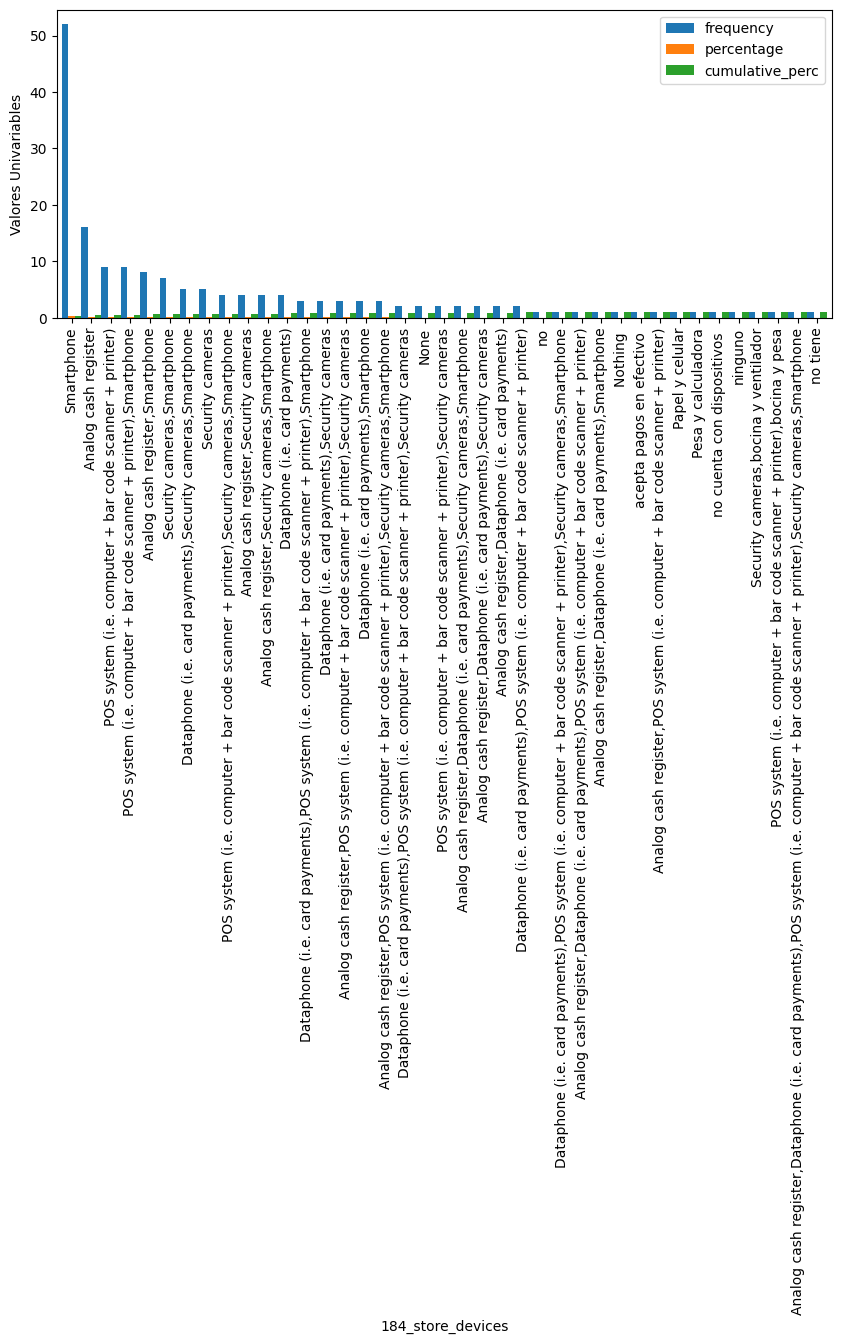

In [48]:
#Análisis univariable de una columna
print(c3)
#Gráfica de barras
c3.plot(kind = "bar", width=1, figsize=(10,4))
plt.ylabel("Valores Univariables")


                                frequency  percentage  cumulative_perc
5_change_store_space_last_year                                        
No cambió                              72    0.421053         0.421053
--                                     72    0.421053         0.842105
Disminuyó 15%                           9    0.052632         0.894737
Aumentó 25%                             7    0.040936         0.935673
Aumentó 15%                             4    0.023392         0.959064
Aumentó 50% o más                       4    0.023392         0.982456
Disminuyó 25%                           2    0.011696         0.994152
Disminuyó 50% o más                     1    0.005848         1.000000


Text(0, 0.5, 'Valores Univariables')

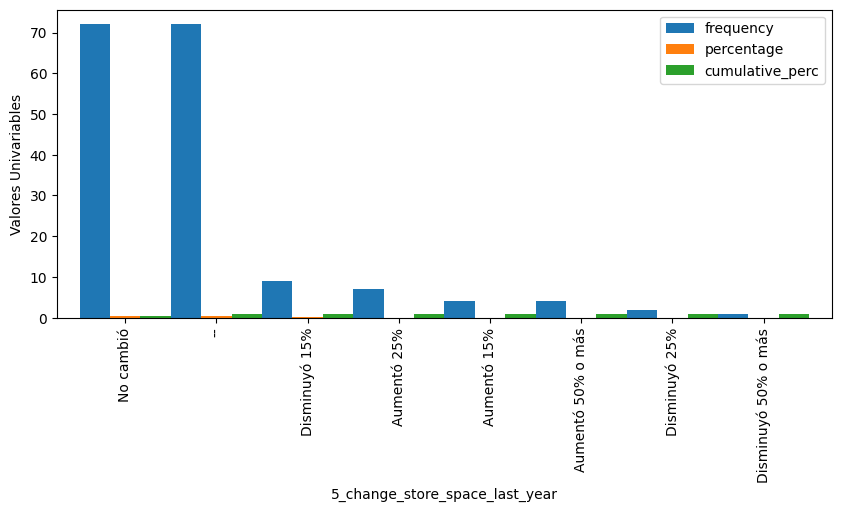

In [49]:
#Análisis univariable de una columna
print(c4)
#Gráfica de barras
c4.plot(kind = "bar", width=1, figsize=(10,4))
plt.ylabel("Valores Univariables")

                                                   frequency  percentage  \
49_inventory_records                                                       
--                                                        61    0.356725   
En papel                                                  40    0.233918   
Software especializado + computadora                      21    0.122807   
En Excel                                                  20    0.116959   
No lo hago                                                18    0.105263   
En Excel,En papel                                          7    0.040936   
Mentalmente                                                1    0.005848   
Aplicación móvil (i.e. App) + smartphone                   1    0.005848   
En papel,Mental                                            1    0.005848   
Aplicación móvil (i.e. App) + smartphone,En Excel          1    0.005848   

                                                   cumulative_perc  
49_inventory_recor

Text(0, 0.5, 'Valores Univariables')

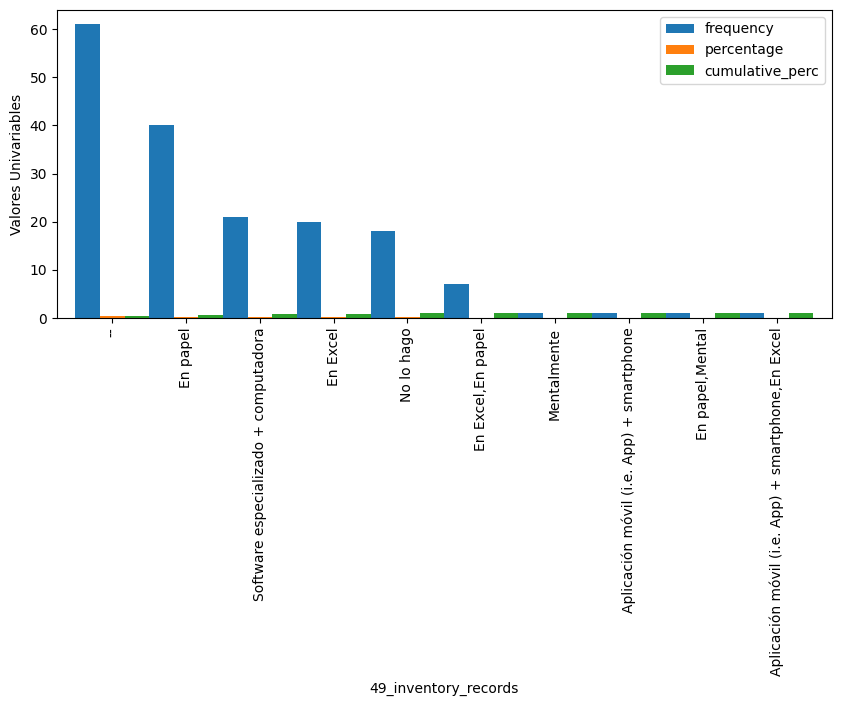

In [50]:
#Análisis univariable de una columna
print(c5)
#Gráfica de barras
c5.plot(kind = "bar", width=1, figsize=(10,4))
plt.ylabel("Valores Univariables")


                                                    frequency  percentage  \
18_sales_records                                                            
--                                                         61    0.356725   
En papel                                                   47    0.274854   
Software especializado + computadora                       22    0.128655   
No lo hago                                                 14    0.081871   
En Excel                                                   10    0.058480   
Caja registradora (análoga)                                 4    0.023392   
En Excel,En papel                                           4    0.023392   
Aplicación móvil (i.e. App) + smartphone                    1    0.005848   
Aplicación móvil (i.e. App) + smartphone,Caja r...          1    0.005848   
Contadora                                                   1    0.005848   
Notas                                                       1    0.005848   

Text(0, 0.5, 'Valores Univariables')

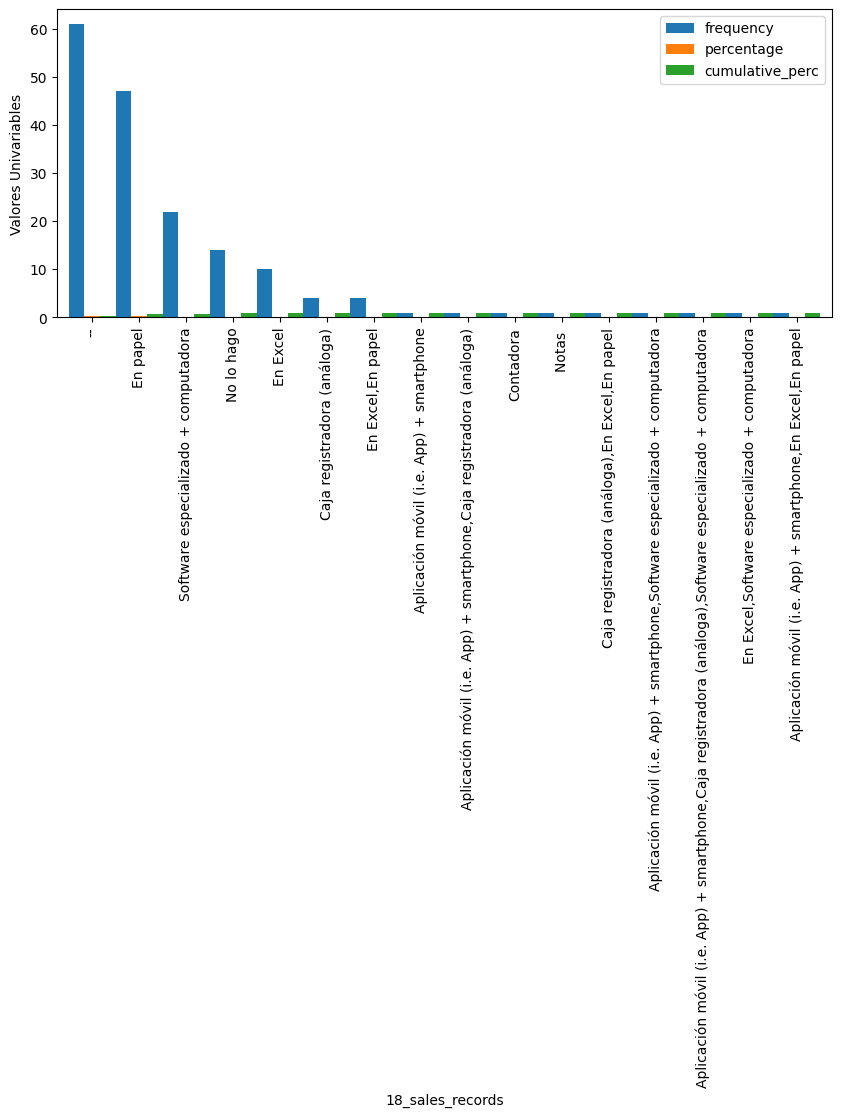

In [51]:
#Análisis univariable de una columna
print(c6)
#Gráfica de barras
c6.plot(kind = "bar", width=1, figsize=(10,4))
plt.ylabel("Valores Univariables")

                                                    frequency  percentage  \
210_sales_channels                                                          
--                                                         89    0.520468   
Redes sociales (e.g. Facebook, Instagram)                  11    0.064327   
WhatsApp                                                   10    0.058480   
Redes sociales (e.g. Facebook, Instagram),WhatsApp          9    0.052632   
Llamada a Teléfono fijo                                     6    0.035088   
Llamada a Teléfono celular,WhatsApp                         6    0.035088   
Llamada a Teléfono celular                                  5    0.029240   
Llamada a Teléfono celular,Redes sociales (e.g....          5    0.029240   
Llamada a Teléfono celular,Llamada a Teléfono f...          3    0.017544   
Ninguno                                                     3    0.017544   
Página web propia                                           3    0.017544   

Text(0, 0.5, 'Valores Univariables')

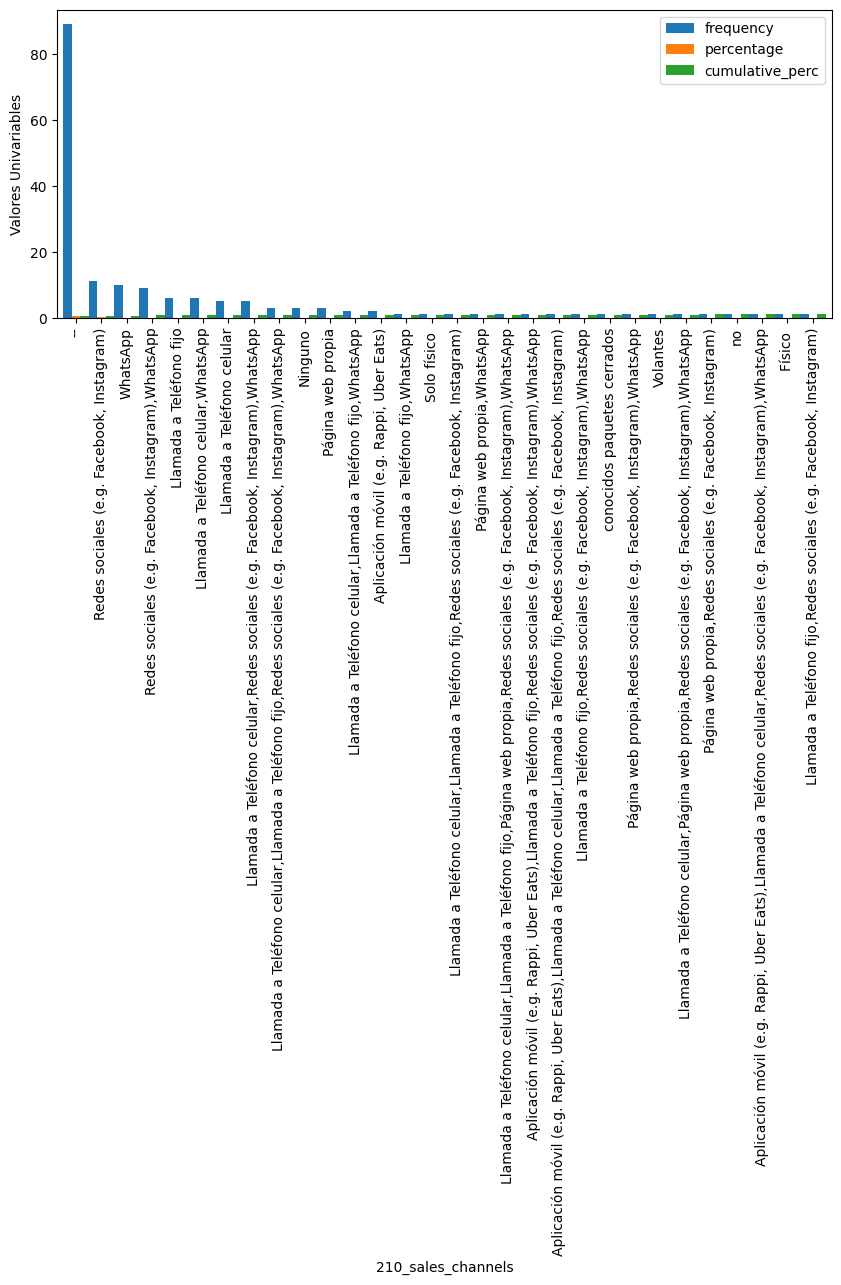

In [52]:
#Análisis univariable de una columna
print(c7)
#Gráfica de barras
c7.plot(kind = "bar", width=1, figsize=(10,4))
plt.ylabel("Valores Univariables")

                                 frequency  percentage  cumulative_perc
214_customer_relationship_tools                                        
--                                      76    0.444444         0.444444
Redes sociales                          27    0.157895         0.602339
Aplicación móvil                        21    0.122807         0.725146
Ninguna                                 20    0.116959         0.842105
Aplicación móvil,Redes sociales         13    0.076023         0.918129
Cuaderno                                 6    0.035088         0.953216
Teléfono                                 1    0.005848         0.959064
Cuaderno,Redes sociales                  1    0.005848         0.964912
Aplicación móvil,De frente               1    0.005848         0.970760
Físico                                   1    0.005848         0.976608
Aplicación móvil,Ninguna                 1    0.005848         0.982456
publicidades                             1    0.005848         0

Text(0, 0.5, 'Valores Univariables')

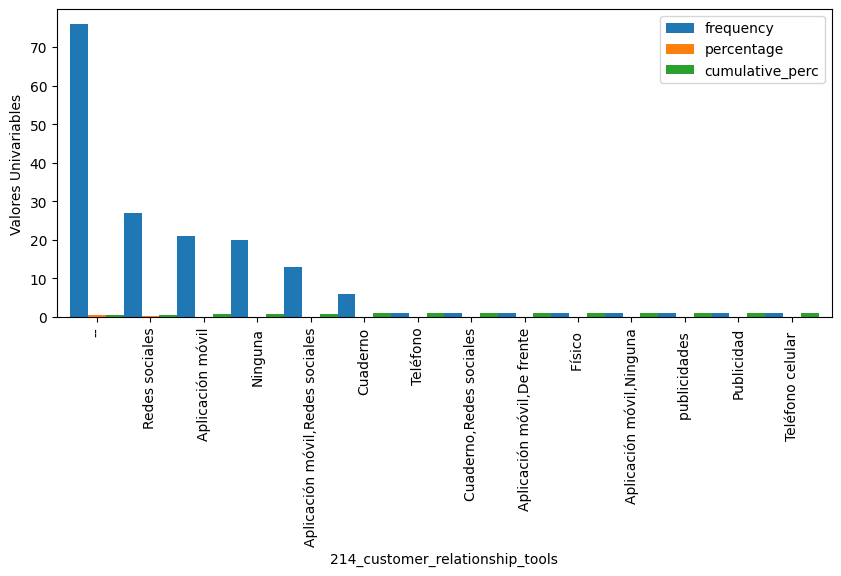

In [53]:
#Análisis univariable de una columna
print(c8)
#Gráfica de barras
c8.plot(kind = "bar", width=1, figsize=(10,4))
plt.ylabel("Valores Univariables")

                                frequency  percentage  cumulative_perc
157_frequency_organize_shelves                                        
--                                     75    0.438596         0.438596
Semanalmente                           40    0.233918         0.672515
Diariamente                            32    0.187135         0.859649
Nunca                                   8    0.046784         0.906433
Mensualmente                            7    0.040936         0.947368
Quincenalmente                          5    0.029240         0.976608
Anualmente                              2    0.011696         0.988304
Semestralmente                          1    0.005848         0.994152
No se tiene                             1    0.005848         1.000000


Text(0, 0.5, 'Valores Univariables')

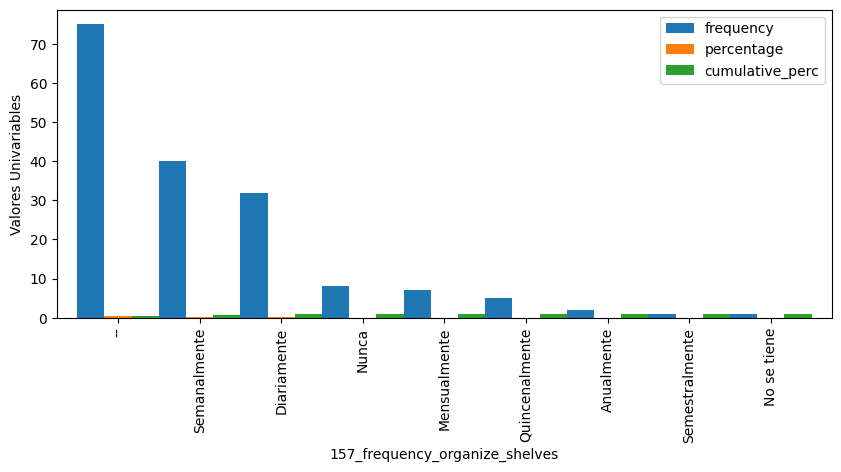

In [54]:
#Análisis univariable de una columna
print(c9)
#Gráfica de barras
c9.plot(kind = "bar", width=1, figsize=(10,4))
plt.ylabel("Valores Univariables")

###Gráficas de pastel

                                                  frequency  percentage  \
108_does_the_micro_retailer_has_a_barred_window_                          
no                                                      124    0.725146   
yes                                                      47    0.274854   

                                                  cumulative_perc  
108_does_the_micro_retailer_has_a_barred_window_                   
no                                                       0.725146  
yes                                                      1.000000  


<Axes: ylabel='percentage'>

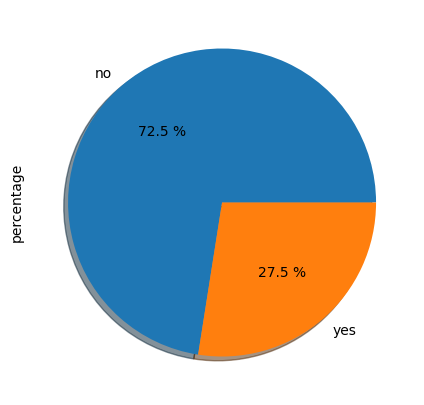

In [55]:
#Análisis univariable de una columna
print(c10)
#Gráfica de barras
c10["percentage"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

                                                    frequency  percentage  \
99_does_the_micro_retailer_exhibits_products_ou...                          
no                                                        120    0.701754   
yes                                                        51    0.298246   

                                                    cumulative_perc  
99_does_the_micro_retailer_exhibits_products_ou...                   
no                                                         0.701754  
yes                                                        1.000000  


<Axes: ylabel='percentage'>

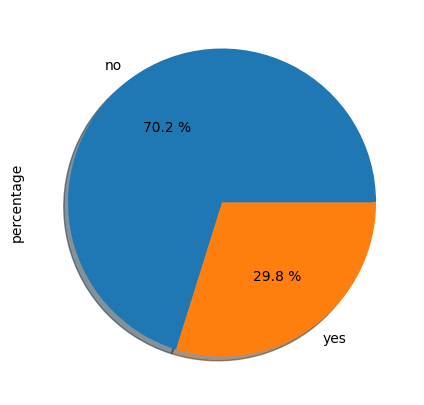

In [56]:
#Análisis univariable de una columna
print(c11)
#Gráfica de barras
c11["percentage"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

                                                   frequency  percentage  \
102_does_the_micro_retailer_sells_fresh_products_                          
no                                                       105    0.614035   
yes                                                       66    0.385965   

                                                   cumulative_perc  
102_does_the_micro_retailer_sells_fresh_products_                   
no                                                        0.614035  
yes                                                       1.000000  


<Axes: ylabel='percentage'>

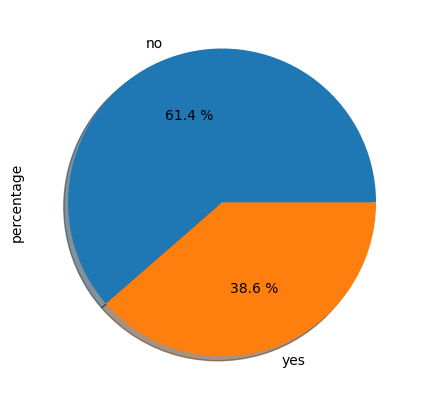

In [57]:
#Análisis univariable de una columna
print(c12)
#Gráfica de barras
c12["percentage"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

                             frequency  percentage  cumulative_perc
20_reviews_finances_monthly                                        
yes                                 79    0.461988         0.461988
--                                  63    0.368421         0.830409
no                                  29    0.169591         1.000000


<Axes: ylabel='percentage'>

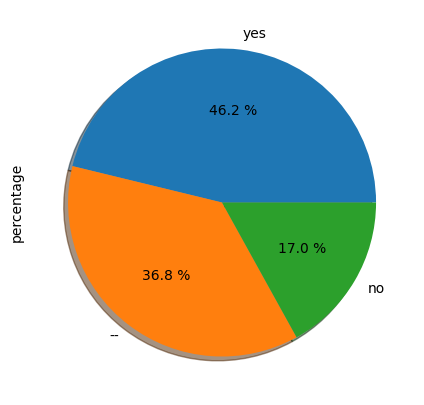

In [58]:
#Análisis univariable de una columna
print(c13)
#Gráfica de barras
c13["percentage"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

           frequency  percentage  cumulative_perc
19_tax_id                                        
--                71    0.415205         0.415205
yes               70    0.409357         0.824561
no                30    0.175439         1.000000


<Axes: ylabel='percentage'>

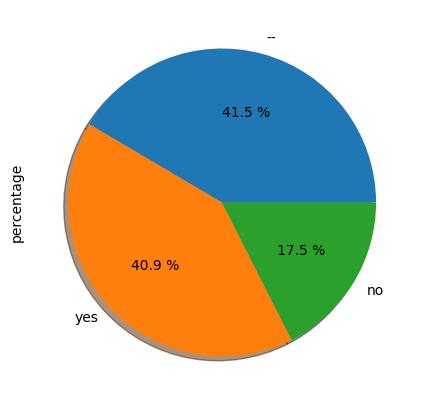

In [59]:
#Análisis univariable de una columna
print(c14)
#Gráfica de barras
c14["percentage"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

             frequency  percentage  cumulative_perc
310_burnout                                        
no                  68    0.397661         0.397661
--                  64    0.374269         0.771930
yes                 39    0.228070         1.000000


<Axes: ylabel='percentage'>

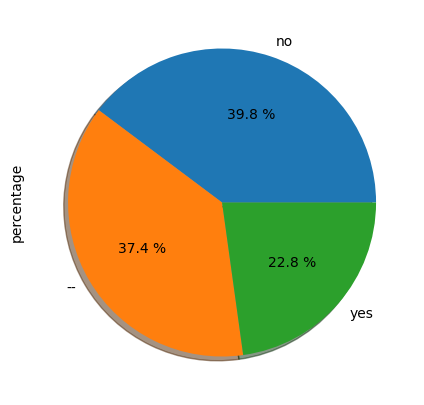

In [60]:
#Análisis univariable de una columna
print(c15)
#Gráfica de barras
c15["percentage"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

                         frequency  percentage  cumulative_perc
186_internet_connection                                        
yes                             76    0.444444         0.444444
--                              63    0.368421         0.812865
no                              32    0.187135         1.000000


<Axes: ylabel='percentage'>

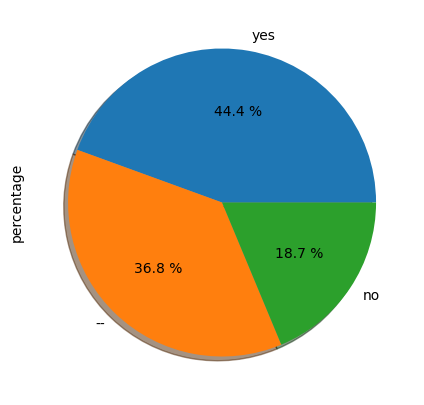

In [61]:
#Análisis univariable de una columna
print(c16)
#Gráfica de barras
c16["percentage"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

                        frequency  percentage  cumulative_perc
33_credit_to_customers                                        
no                             80    0.467836         0.467836
--                             64    0.374269         0.842105
yes                            27    0.157895         1.000000


<Axes: ylabel='percentage'>

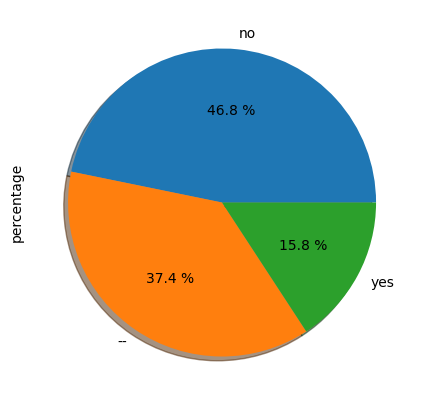

In [62]:
#Análisis univariable de una columna
print(c17)
#Gráfica de barras
c17["percentage"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

                                   frequency  percentage  cumulative_perc
227_agreement_ecommerce_platforms                                        
no                                        88    0.514620          0.51462
--                                        73    0.426901          0.94152
yes                                       10    0.058480          1.00000


<Axes: ylabel='percentage'>

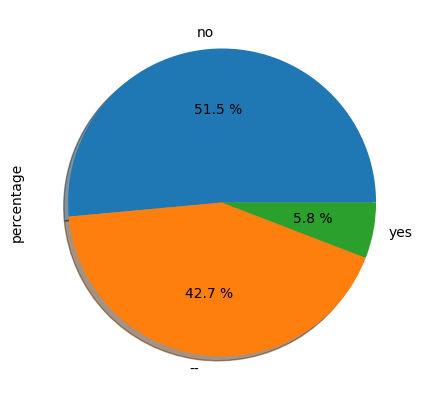

In [63]:
#Análisis univariable de una columna
print(c18)
#Gráfica de barras
c18["percentage"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

                                             frequency  percentage  \
6_change_employees_average_salary_last_year                          
--                                                  86    0.502924   
No cambió                                           50    0.292398   
Aumentó 15%                                         14    0.081871   
Disminuyó 15%                                        5    0.029240   
Aumentó 25%                                          4    0.023392   
Aumentó 50% o más                                    4    0.023392   
Disminuyó 25%                                        3    0.017544   
Dependiente                                          1    0.005848   
Disminuyó 50% o más                                  1    0.005848   
0                                                    1    0.005848   
No hay empleándosela                                 1    0.005848   
40                                                   1    0.005848   

                   

<Axes: ylabel='percentage'>

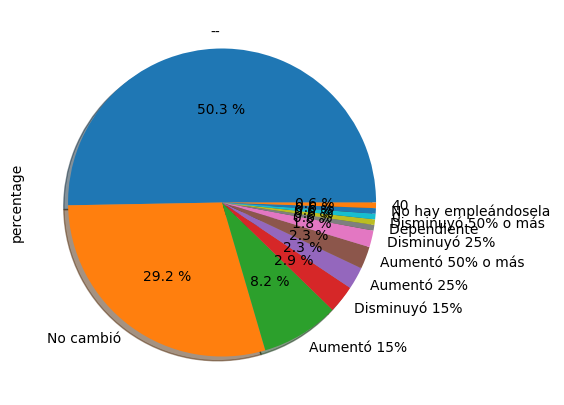

In [64]:
#Análisis univariable de una columna
print(c19)
#Gráfica de barras
c19["percentage"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

                                         frequency  percentage  \
193_sales_planning_tools                                         
--                                              89    0.520468   
Ninguna                                         33    0.192982   
Cuaderno                                        21    0.122807   
Software especializado                           6    0.035088   
Excel                                            6    0.035088   
Cuaderno,Excel                                   3    0.017544   
Cuaderno,Ninguna                                 2    0.011696   
Other                                            1    0.005848   
Mental                                           1    0.005848   
Por temporada de pan                             1    0.005848   
Sobre demanda                                    1    0.005848   
Aplicación móvil,Software especializado          1    0.005848   
Excel,Software especializado                     1    0.005848   
Catálogo  

<Axes: ylabel='percentage'>

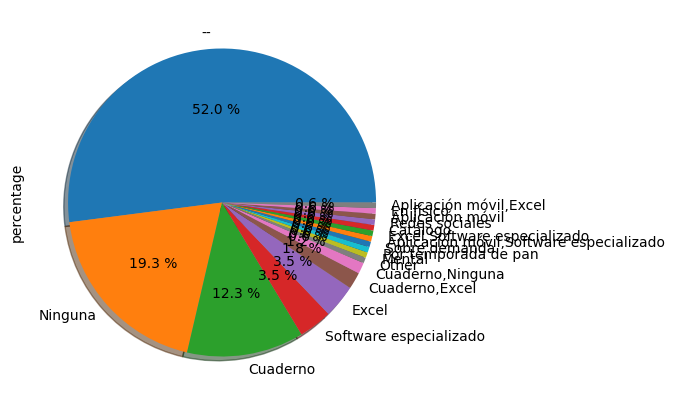

In [65]:
#Análisis univariable de una columna
print(c20)
#Gráfica de barras
c20["percentage"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [68]:
#Convertir DataFrame a CSV
from google.colab import files

c1.to_csv("c1.csv")
files.download("c1.csv")

c2.to_csv("c2.csv")
files.download("c2.csv")

c3.to_csv("c3.csv")
files.download("c3.csv")

c4.to_csv("c4.csv")
files.download("c4.csv")

c5.to_csv("c5.csv")
files.download("c5.csv")

c6.to_csv("c6.csv")
files.download("c6.csv")

c7.to_csv("c7.csv")
files.download("c7.csv")

c8.to_csv("c8.csv")
files.download("c8.csv")

c9.to_csv("c9.csv")
files.download("c9.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
c10.to_csv("c10.csv")
files.download("c10.csv")

c11.to_csv("c11.csv")
files.download("c11.csv")

c12.to_csv("c12.csv")
files.download("c12.csv")

c13.to_csv("c13.csv")
files.download("c13.csv")

c14.to_csv("c14.csv")
files.download("c14.csv")

c15.to_csv("c15.csv")
files.download("c15.csv")

c16.to_csv("c16.csv")
files.download("c16.csv")

c17.to_csv("c17.csv")
files.download("c17.csv")

c18.to_csv("c18.csv")
files.download("c18.csv")

c19.to_csv("c19.csv")
files.download("c19.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
c20.to_csv("c20.csv")
files.download("c20.csv")

df.to_csv("df_limpio.csv")
files.download("df_limpio.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>